In [274]:
import pandas as pd
import seaborn as sns

In [275]:
sns.set_theme(rc={'figure.figsize':(15,5)})

In [276]:
ProductCategory = pd.read_csv('AD/AdventureWorks_Product_Categories.csv')
ProductSubCategory = pd.read_csv('AD/AdventureWorks_Product_Subcategories.csv')
Product = pd.read_csv('AD/AdventureWorks_Products.csv')
Products_data = pd.merge(pd.merge(ProductCategory,ProductSubCategory),Product,on='ProductSubcategoryKey')


In [277]:
Products_data.columns

Index(['ProductCategoryKey', 'CategoryName', 'ProductSubcategoryKey',
       'SubcategoryName', 'ProductKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice'],
      dtype='object')

In [278]:
cat_df = Products_data.groupby(['CategoryName','SubcategoryName'],as_index = False).agg(ProductsCnt = ('ProductKey','count'))

<Axes: xlabel='SubcategoryName', ylabel='ProductsCnt'>

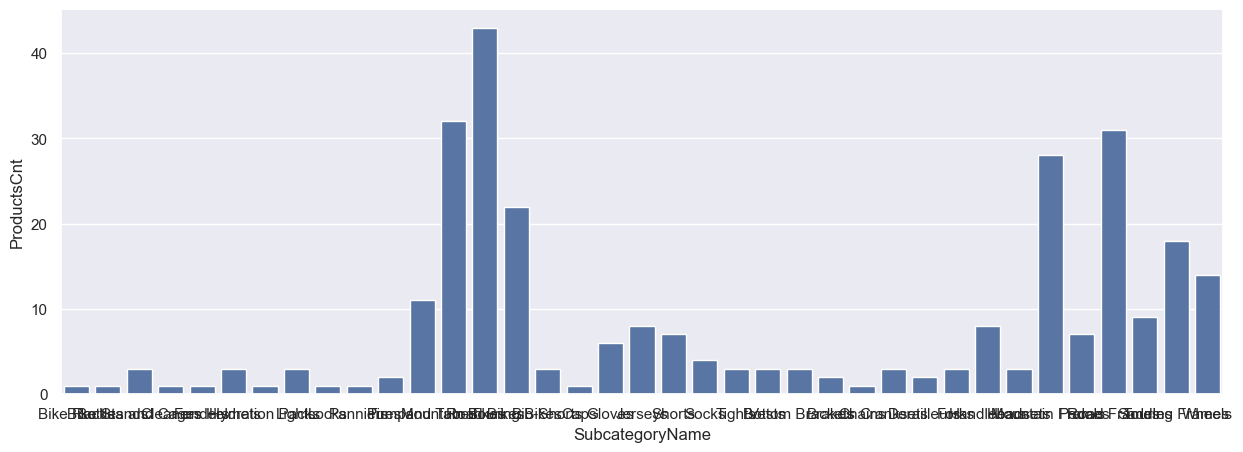

In [279]:
sns.barplot(data=cat_df,x= cat_df['SubcategoryName'],y = cat_df['ProductsCnt'])

<Axes: xlabel='CategoryName', ylabel='ProductKey'>

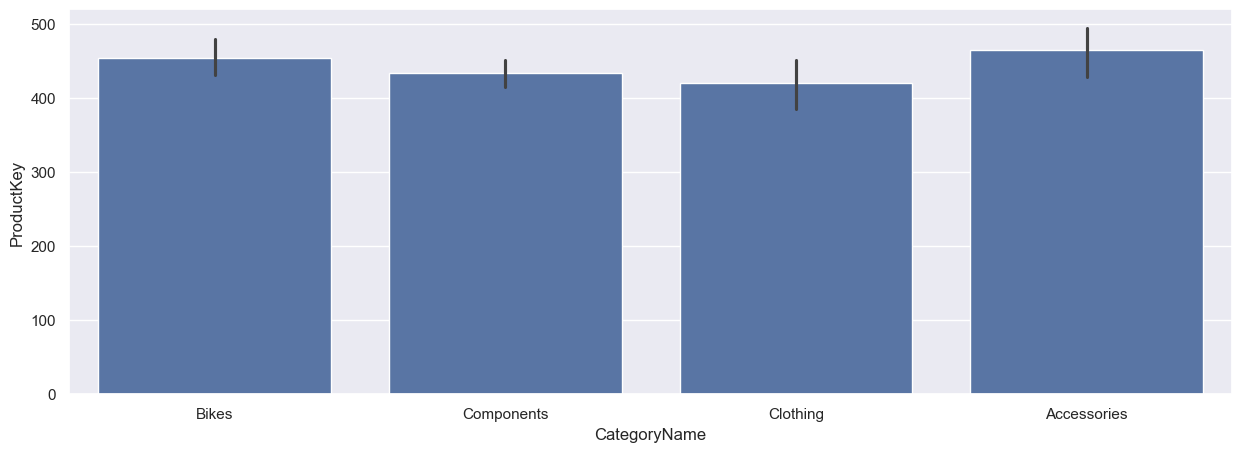

In [280]:
sns.barplot(data=Products_data,x=Products_data['CategoryName'],y=Products_data['ProductKey'])

In [281]:
Products_data.columns

Index(['ProductCategoryKey', 'CategoryName', 'ProductSubcategoryKey',
       'SubcategoryName', 'ProductKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice'],
      dtype='object')

In [282]:
sales  = pd.concat([pd.read_csv('AD/AdventureWorks_Sales_2015.csv'),pd.read_csv('AD/AdventureWorks_Sales_2016.csv'),pd.read_csv('AD/AdventureWorks_Sales_2017.csv')],ignore_index=True)
sales.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity'],
      dtype='object')

In [283]:
Products_data.columns

Index(['ProductCategoryKey', 'CategoryName', 'ProductSubcategoryKey',
       'SubcategoryName', 'ProductKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice'],
      dtype='object')

In [284]:
SalesByProduct = pd.merge(Products_data,sales,on='ProductKey',how = 'left')
SalesByProduct = SalesByProduct[['CategoryName','ProductName','ProductPrice','OrderQuantity','OrderDate']]
SalesByProduct['OrderDate'] = pd.to_datetime(SalesByProduct['OrderDate'])
SalesByProduct['SalesYear'] = SalesByProduct['OrderDate'].dt.year
SalesByProduct['SalesAmount'] = SalesByProduct['ProductPrice'] * SalesByProduct['OrderQuantity']
SalesByProduct = SalesByProduct.groupby(['SalesYear','CategoryName'],as_index=False).agg(Total_Sales = ('SalesAmount','sum'))
SalesByProduct

,SalesYear,CategoryName,Total_Sales
0,2015.0,Bikes,6.404934e+06
1,2016.0,Accessories,3.993421e+05
2,2016.0,Bikes,8.768707e+06
3,2016.0,Clothing,1.561547e+05
4,2017.0,Accessories,5.073310e+05
5,2017.0,Bikes,8.468855e+06
6,2017.0,Clothing,2.092639e+05


<Axes: xlabel='SalesYear', ylabel='Total_Sales'>

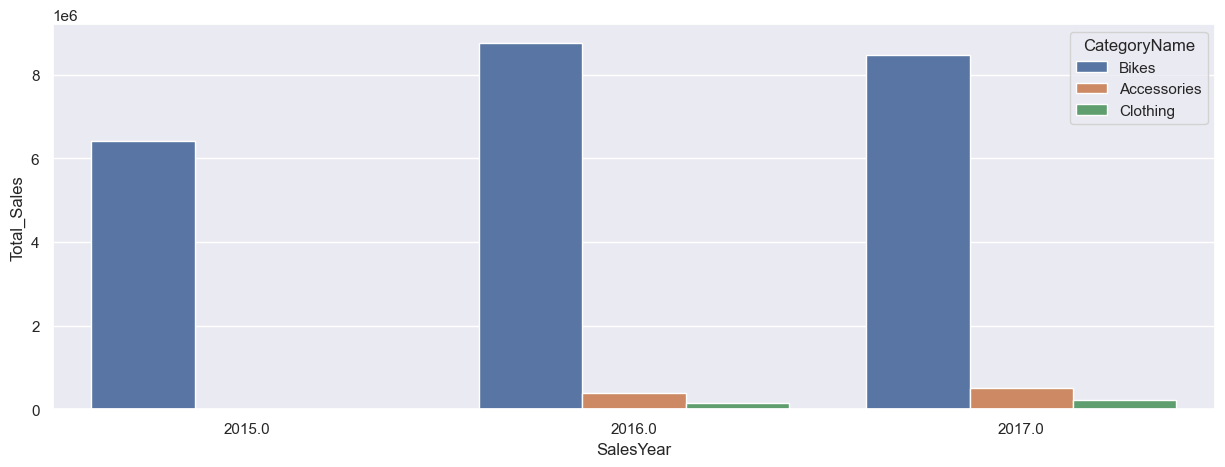

In [285]:
sns.barplot(x =SalesByProduct['SalesYear'],y=SalesByProduct['Total_Sales'],hue=SalesByProduct['CategoryName'])

In [286]:
SalesByProduct = pd.merge(Products_data,sales,on='ProductKey',how = 'left')
SalesByProduct = SalesByProduct[['CategoryName','ProductName','ProductPrice','OrderQuantity','OrderDate']]
SalesByProduct['OrderDate'] = pd.to_datetime(SalesByProduct['OrderDate'])
SalesByProduct['SalesYear'] = SalesByProduct['OrderDate'].dt.year
SalesByProduct['SalesAmount'] = SalesByProduct['ProductPrice'] * SalesByProduct['OrderQuantity']
SalesByProductDaily = SalesByProduct.groupby(['OrderDate','CategoryName'],as_index=False).agg(Total_Sales = ('SalesAmount','sum'),Total_Quantity =('OrderQuantity','sum'))
SalesByProductDaily
#sns.lineplot(data=SalesByProductDaily,x=SalesByProductDaily['OrderDate'],y=SalesByProductDaily['Total_Sales'],hue=SalesByProductDaily['CategoryName'])

,OrderDate,CategoryName,Total_Sales,Total_Quantity
0,2015-01-01,Bikes,8351.4564,4.0
1,2015-01-02,Bikes,14313.0800,4.0
2,2015-01-03,Bikes,28041.3200,8.0
3,2015-01-04,Bikes,17713.0700,5.0
4,2015-01-05,Bikes,7855.6382,3.0
...,...,...,...,...
1636,2017-06-29,Bikes,54816.5194,40.0
1637,2017-06-29,Clothing,1313.6300,47.0
1638,2017-06-30,Accessories,2265.8404,161.0
1639,2017-06-30,Bikes,40117.2425,25.0


In [287]:
Yearly_sales = SalesByProductDaily


In [288]:
SalesByProduct

,CategoryName,ProductName,ProductPrice,OrderQuantity,OrderDate,SalesYear,SalesAmount
0,Bikes,"Mountain-100 Silver, 38",3399.99,1.0,2015-01-04,2015.0,3399.99
1,Bikes,"Mountain-100 Silver, 38",3399.99,1.0,2015-01-08,2015.0,3399.99
2,Bikes,"Mountain-100 Silver, 38",3399.99,1.0,2015-01-11,2015.0,3399.99
3,Bikes,"Mountain-100 Silver, 38",3399.99,1.0,2015-01-14,2015.0,3399.99
4,Bikes,"Mountain-100 Silver, 38",3399.99,1.0,2015-01-14,2015.0,3399.99
...,...,...,...,...,...,...,...
56204,Accessories,Touring Tire,28.99,1.0,2017-06-28,2017.0,28.99
56205,Accessories,Touring Tire,28.99,2.0,2017-06-29,2017.0,57.98
56206,Accessories,Touring Tire,28.99,1.0,2017-06-29,2017.0,28.99
56207,Accessories,Touring Tire,28.99,2.0,2017-06-29,2017.0,57.98


In [289]:
SalesByProduct = SalesByProduct.groupby(['SalesYear','CategoryName'],as_index=False).agg(Total_Sales = ('SalesAmount','sum'))
SalesByProduct

,SalesYear,CategoryName,Total_Sales
0,2015.0,Bikes,6.404934e+06
1,2016.0,Accessories,3.993421e+05
2,2016.0,Bikes,8.768707e+06
3,2016.0,Clothing,1.561547e+05
4,2017.0,Accessories,5.073310e+05
5,2017.0,Bikes,8.468855e+06
6,2017.0,Clothing,2.092639e+05


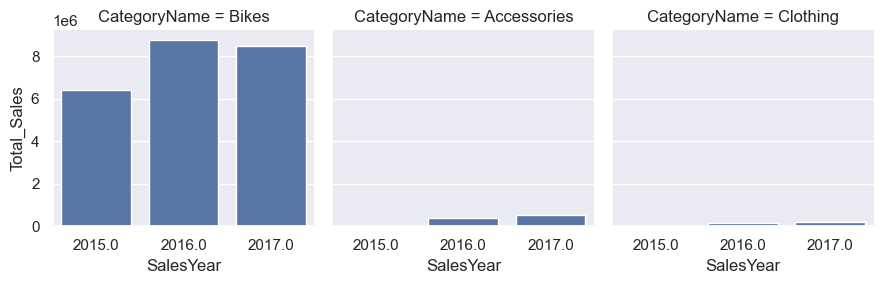

In [291]:
prod_facegrid = sns.FacetGrid(SalesByProduct,col='CategoryName')
prod_facegrid.map_dataframe(sns.barplot,x='SalesYear',y='Total_Sales')

<Axes: xlabel='SalesYear', ylabel='Total_Sales'>

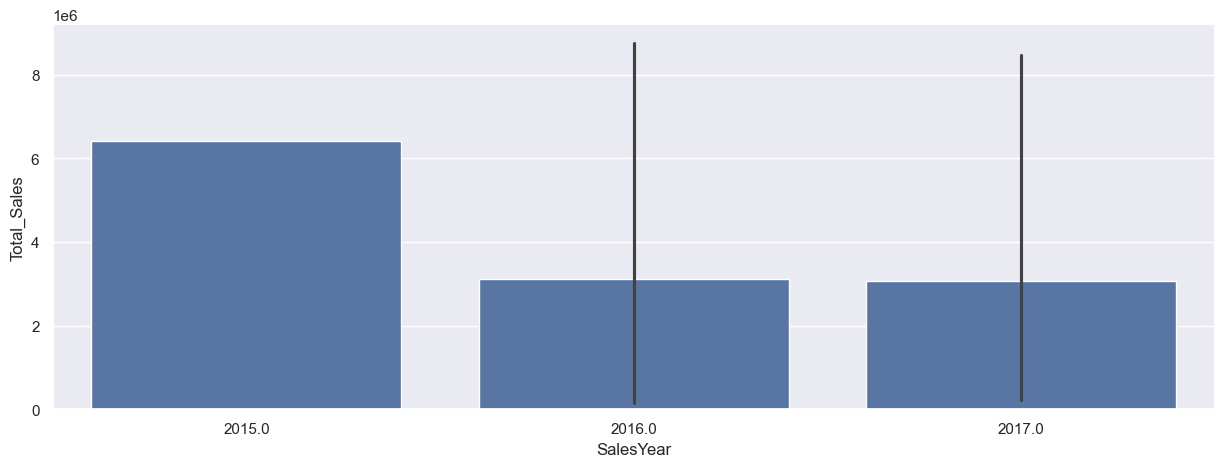

In [301]:
import matplotlib.pyplot as plt
sns.barplot(x=SalesByProduct['SalesYear'],y=SalesByProduct['Total_Sales'])
plt.plot()